#### 二叉树

10.0

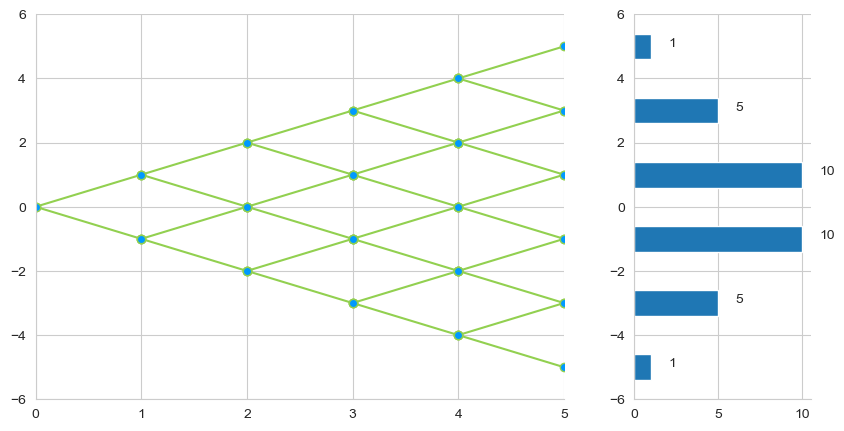

In [14]:
from matplotlib import pyplot as plt
import numpy as np
from scipy.special import binom
from sympy.abc import x
from sympy import Poly
import seaborn as sns

n = 5
# starting point

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5), gridspec_kw={'width_ratios': [3, 1]})

for i in np.arange(n):
    
    Nodes_y = np.linspace(-i, i, i + 1)
    
    # numpy.concatenate() 用于连接数组
    # 将 Nodes_y + 1 和 Nodes_y - 1 沿纵向连接
    B_y = np.concatenate((Nodes_y + 1, Nodes_y - 1))
    # 生成与 B_y 大小相同的数组，所有的元素都为 i+1，表示 B 点的横坐标
    B_x = np.zeros_like(B_y) + i + 1
    # 生成包含 B 点的坐标，第一行是横坐标，第二行是纵坐标
    B = np.stack((B_x, B_y))

    # numpy.concatenate() 用于连接数组
    # 将 Nodes_y 数组和 Nodes_y 数组连接在一起，生成 A_y 数组
    A_y = np.concatenate((Nodes_y, Nodes_y))
    A_x = np.zeros_like(A_y) + i
    
    # 分别表示线段 AB 的坐标变化
    x_AB = np.stack((A_x, B_x))
    y_AB = np.stack((A_y, B_y))

    ax1.plot(x_AB, y_AB, 'o-', color='#92D050',
             markerfacecolor='#0099FF',
             markeredgecolor=None)

ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.set_xlim(0, n)
ax1.set_ylim(B_y.min() - 1, B_y.max() + 1)

degrees = np.linspace(n, 0, n + 1)

# 通过 binom() 计算二次项系数
poly_coeffs = binom(n, degrees)

locations = np.linspace(B_y.min(), B_y.max(), n + 1)

# 绘制水平条形图
ax2.barh(locations, poly_coeffs, align='center')

for i, (x, y) in enumerate(zip(locations.tolist(), poly_coeffs.tolist())):
    ax2.text(y + poly_coeffs.max() * 0.1, x, str(int(y)))

ax2.set_ylim(B_y.min() - 1, B_y.max() + 1)
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)


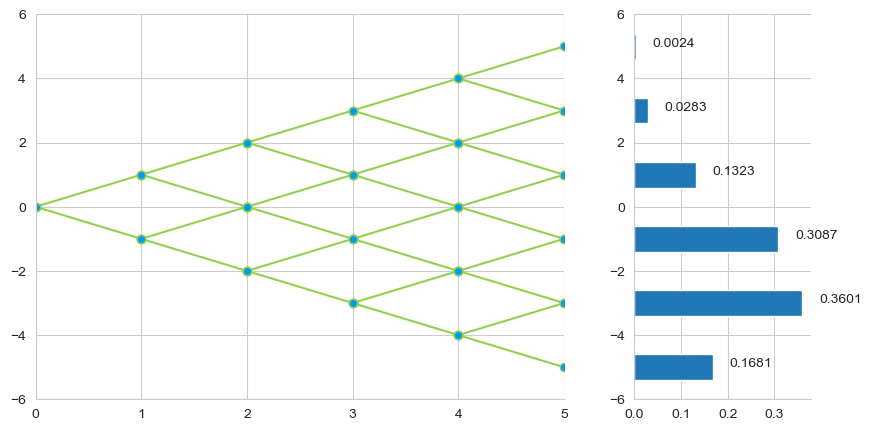

In [3]:
from scipy.stats import binom

p = 0.3  # 0.5

x = np.arange(0, n + 1)

# 二项分布概率质量函数
p_x = binom.pmf(x, n, p)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5), gridspec_kw={'width_ratios': [3, 1]})

for i in np.arange(n):
    
    Nodes_y = np.linspace(-i, i, i + 1)
    
    # numpy.concatenate() 用于连接数组
    # 将 Nodes_y + 1 和 Nodes_y - 1 沿纵向连接
    B_y = np.concatenate((Nodes_y + 1, Nodes_y - 1))
    # 生成与 B_y 大小相同的数组，所有的元素都为 i+1，表示 B 点的横坐标
    B_x = np.zeros_like(B_y) + i + 1
    # 生成包含 B 点的坐标，第一行是横坐标，第二行是纵坐标
    B = np.stack((B_x, B_y))
    
    # numpy.concatenate() 用于连接数组
    # 将 Nodes_y 数组和 Nodes_y 数组连接在一起，生成 A_y 数组
    A_y = np.concatenate((Nodes_y, Nodes_y))
    A_x = np.zeros_like(A_y) + i

    # 分别表示线段 AB 的坐标变化
    x_AB = np.stack((A_x, B_x))
    y_AB = np.stack((A_y, B_y))

    ax1.plot(x_AB, y_AB, 'o-', color='#92D050',
             markerfacecolor='#0099FF',
             markeredgecolor=None)

ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)

ax1.set_xlim(0, n)
ax1.set_ylim(B_y.min() - 1, B_y.max() + 1)

ax2.barh(locations, p_x, align='center')

for i, (x, y) in enumerate(zip(locations.tolist(), p_x.tolist())):
    ax2.text(y + p_x.max() * 0.1, x, "{:.4f}".format(y))

ax2.set_ylim(B_y.min() - 1, B_y.max() + 1)
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)


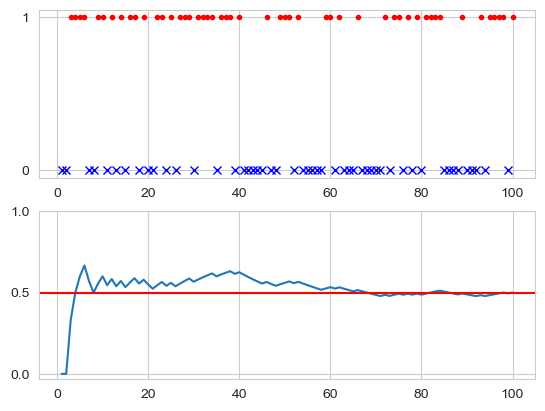

In [2]:
import numpy as np
import matplotlib.pyplot as plt

num_toss = 100
# 均匀分布
toss = np.random.randint(low = 0, high = 2, size = (num_toss,1))

up = (toss == 1)

# 投掷次数
iteration = np.arange(1,num_toss + 1)

fig, axs  = plt.subplots(2,1)

# 绘制正面投掷结果
axs[0].plot(iteration[up.flatten()],  toss[up],  
         color = 'r', marker = '.',linestyle = 'None')
# 绘制反面投掷结果
axs[0].plot(iteration[~up.flatten()], toss[~up], 
         color = 'b', marker = 'x',linestyle = 'None')

axs[0].set_yticks([0,1])

# 投掷结果累计平均值
cum_mean = np.cumsum(toss)/iteration

axs[1].plot(iteration, cum_mean)
axs[1].axhline(y = 0.5, color = 'r')
axs[1].set_yticks([0,0.5,1])